# Social Network Ads
Predict Whether the product has been purchased or not

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
train = pd.read_csv(r'C:\Users\Spectre\Downloads\archive (3)\Social_Network_Ads.csv')

In [126]:
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [127]:
train.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [129]:
train['Gender'] = pd.get_dummies(train['Gender'], drop_first=True)

In [130]:
train['Gender'].head(2)

0    1
1    1
Name: Gender, dtype: uint8

In [131]:
train['Age'].max()

60

In [132]:
bins = [0,40,50,70]
labels = ['Teen', 'Young_adult', 'Elder']
train['Age_bin'] = pd.cut(train['Age'], bins=bins, labels=labels)

In [133]:
train['Age_bin'].value_counts()

Teen           253
Young_adult     98
Elder           49
Name: Age_bin, dtype: int64

<AxesSubplot:xlabel='Age_bin', ylabel='count'>

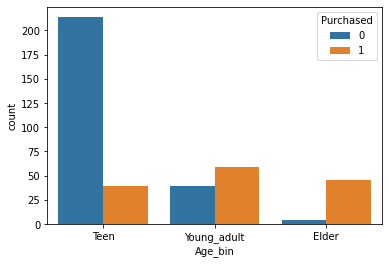

In [135]:
sns.countplot(x = 'Age_bin',data = train, hue = 'Purchased')

Purchased    0   1
Gender            
0          127  77
1          130  66


<AxesSubplot:xlabel='Gender', ylabel='count'>

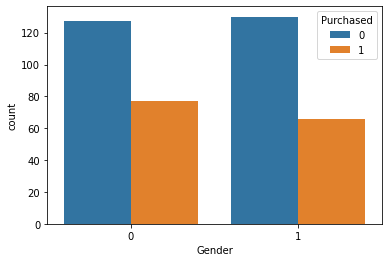

In [136]:
print(pd.crosstab(train['Gender'], train['Purchased']))
sns.countplot(x = 'Gender', data = train, hue = 'Purchased')

We can tell that the females purchased more than the males

# LOGISTIC REGRESSION

In [171]:
x = train.iloc[:,[2,3]]
y = train.iloc[:,4]

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [178]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit(x_train)
X_test = scale.transform(x_test)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
log = LogisticRegression()

In [182]:
log.fit(x_train, y_train)

LogisticRegression()

In [189]:
pred = log.predict(X_test)

In [190]:
from sklearn.metrics import classification_report, confusion_matrix


In [191]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[34 46]
 [27 13]]


              precision    recall  f1-score   support

           0       0.56      0.42      0.48        80
           1       0.22      0.33      0.26        40

    accuracy                           0.39       120
   macro avg       0.39      0.38      0.37       120
weighted avg       0.45      0.39      0.41       120



In [192]:
from sklearn.metrics import accuracy_score

In [193]:
print(accuracy_score(y_test,pred))

0.39166666666666666


In [167]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators=200)

In [152]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [153]:
predictions = rfc.predict(X_test)

In [154]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[70 10]
 [ 3 37]]


              precision    recall  f1-score   support

           0       0.96      0.88      0.92        80
           1       0.79      0.93      0.85        40

    accuracy                           0.89       120
   macro avg       0.87      0.90      0.88       120
weighted avg       0.90      0.89      0.89       120



In [155]:
from sklearn.metrics import accuracy_score

In [156]:
print(accuracy_score(y_test,predictions))

0.8916666666666667


    From our results the Randomforest classifier model worked best for our data with an accuracy of 89%, hence we can accept this model.